# MAG_ADITYA_L1_TUTORIAL_FOR_ISRO-ESA_JOINT_WORKSHOP_2026

This tutorial will guide the participants to download and plot Aditya-L1/MAGNETOMETER data for a given time period. 

# Access the data 

Please follow the following steps to access and download the Aditya-L1 data from ISRO's Space Science Data Center (ISSDC

1. **Visit the PRADAN Portal:**
Go to https://pradan1.issdc.gov.in/al1/ and select 'Access'

2. **Log in to the portal:**
Registration is required for new users. 'Log in' to the portal 

3. **Select the instrument:**
Select Mag (Magnetometer) => select 'Download' from the right drop down menu => select Level 2 files (i.e., files with naming convention as L2_AL1_MAG_YYYYMMDD_VMN.nc) by clicking the tick boxes in the left => Go down => select 'DOWNLOAD SELECTED as zip' 

4. **Unzip the data:**
Unzip the data by conventional method

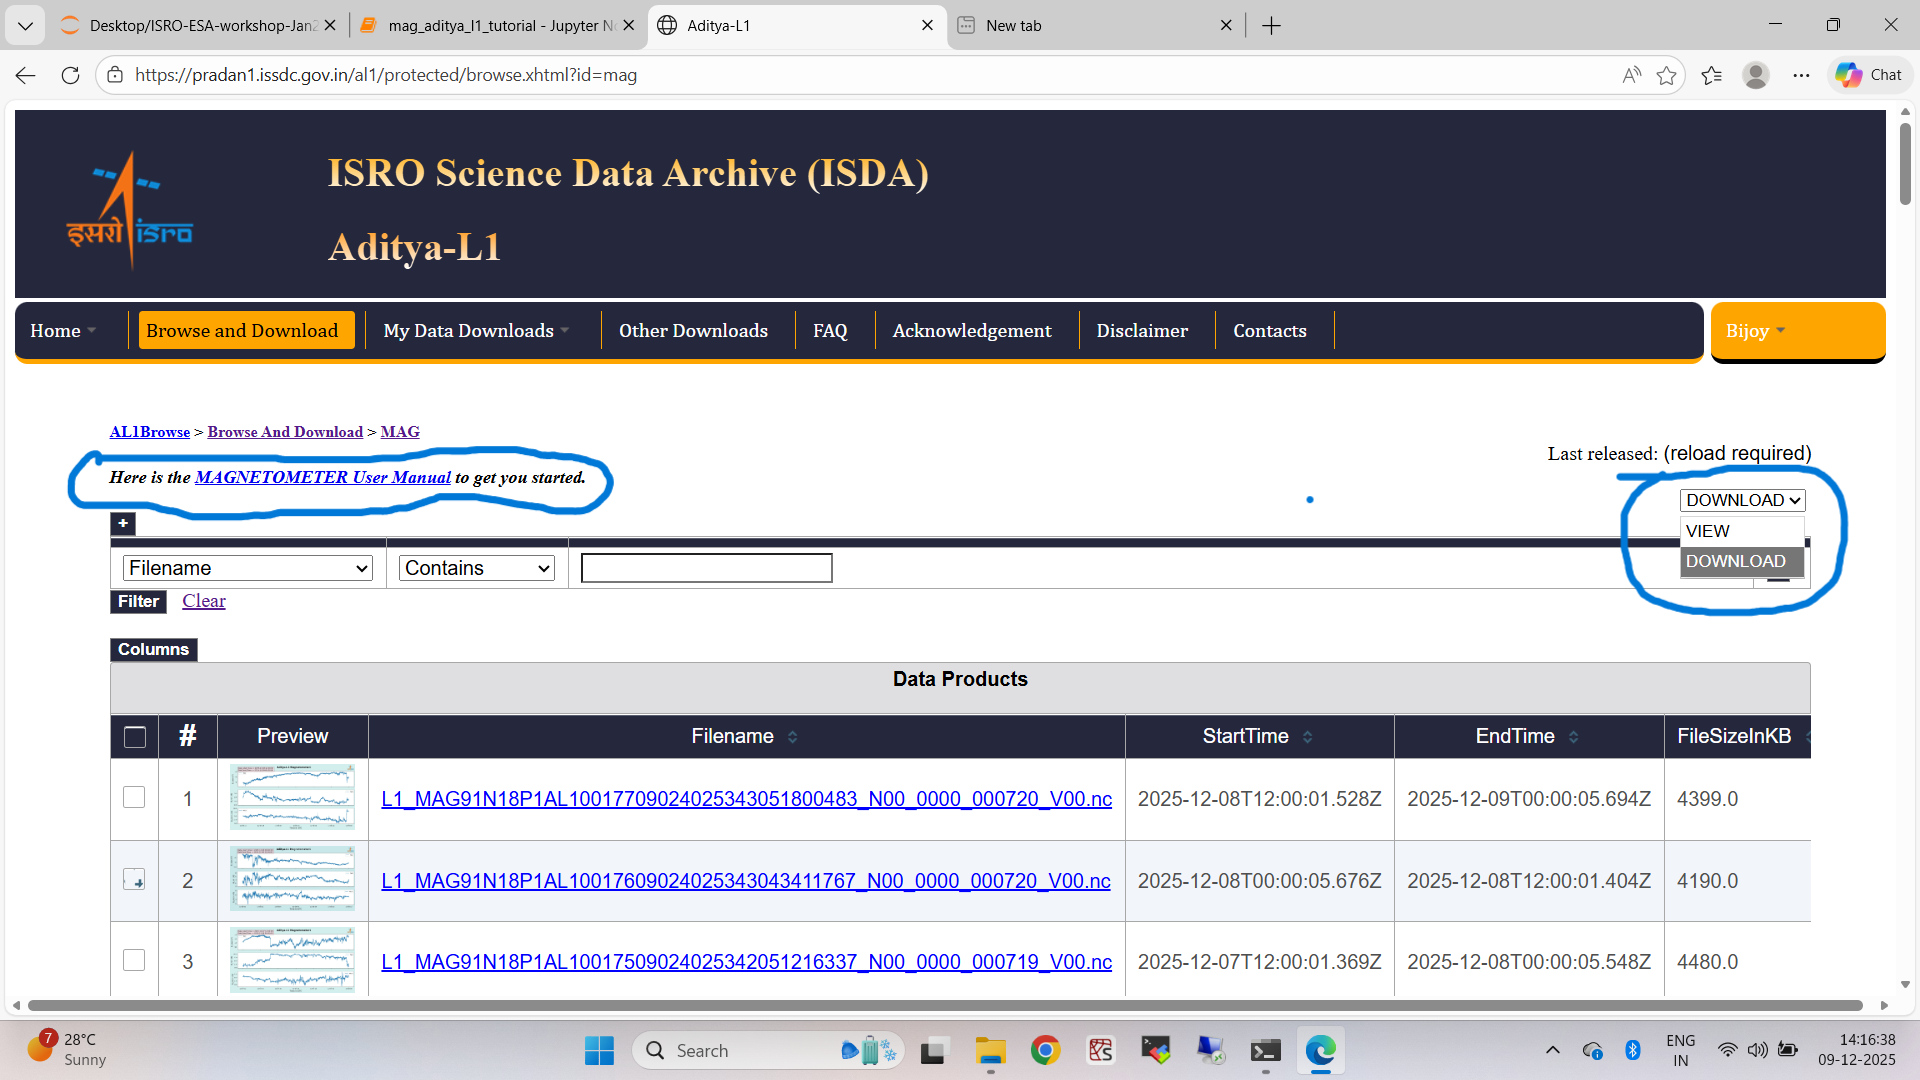

In [1]:
from IPython.display import Image
Image(r'C:\Users\Bijoy\Desktop\ISRO-ESA-workshop-Jan2026\mag_aditya_l1\issdc_al1_mag_download.png')

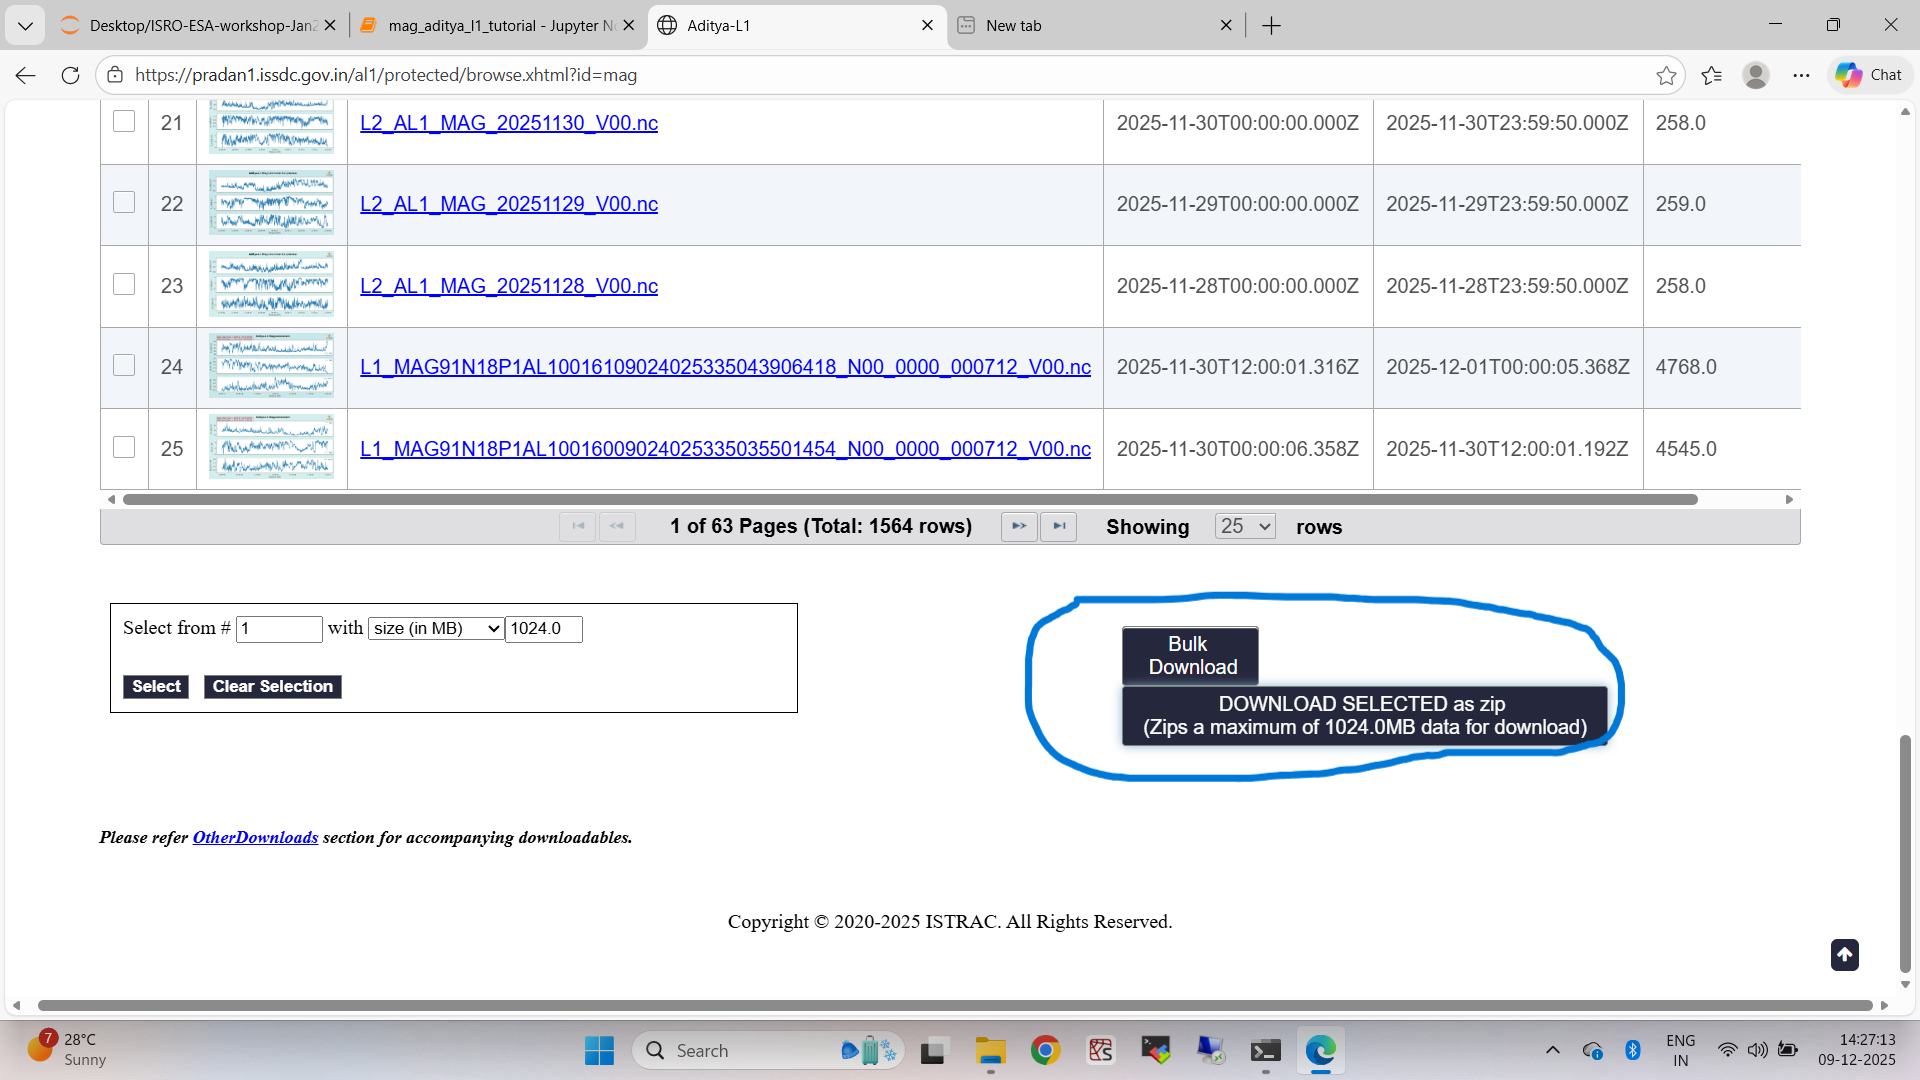

In [2]:
from IPython.display import Image
Image(r'C:\Users\Bijoy\Desktop\ISRO-ESA-workshop-Jan2026\mag_aditya_l1\download.png')

# User manual for magnetometer data
You may consult the data User Manual (available in the 'pradan' site) for details.

# Pyhton code to read and plot MAG data

# Required python libraries
os, numpy, matplotlib, netCDF4

In [7]:
# !pip install netCDF4 
## same command is valid for all other modules also, if not already downloaded. Just replace 'netCDF4' by the name of module 

In [39]:
# Importing required python modules 
import numpy as np
import os
from datetime import datetime, date, timedelta, timezone
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

from dateutil.relativedelta import relativedelta
import pytz
import matplotlib.dates as mdates

In [45]:
# Load the one data file and read all the attributes
file_2='C:\\Users\\Bijoy\\Desktop\\ISRO-ESA-workshop-Jan2026\\mag_aditya_l1\\mag_2025Dec09T085153755\\'
file_2_list=os.listdir(file_2)
file = file_2+file_2_list[1]

nc_file = nc.Dataset(file, 'r')
# print(nc_file)
variables = nc_file.variables.keys()
# print(variables)

# --- Global attributes ---
print("Global attributes:")
for attr in nc_file.ncattrs():
    print(f"{attr} = {getattr(nc_file, attr)}")

# --- Variable attributes ---
print("\nVariable attributes:")
for var_name, var in nc_file.variables.items():
    print(f"\nVariable: {var_name}")
    for attr in var.ncattrs():
        print(f"  {attr} = {getattr(var, attr)}")

Global attributes:
title = Aditya-L1 Magnetometer data
summary = Magnetometer onboard Aditya-L1 provides in-situ measurements of interplanetary
        magnetic field(IMF). The payload consists of two identical tri-axial fluxgate magnetometers placed on a boom at 3m and 6m from the spacecraft.
        The sensor located at 6m is named as MAG1, while the sensor at 3m is labelled MAG2. At Level1,the dataset consists of output from both 
        MAG1 and MAG2 at a cadence of 128ms. These datasets contain the IMF, and a slow varying component of spacecraft field and sensor offsets.
        Using the dataset of both the sensors, estimation of IMF by removal of the slow-varying component is done at Level2. The Level2 dataset 
        is provided at a minimum cadence of 10 seconds in different standard frames like GSE, GSM, and RTN. The science-ready data level from 
        the MAGNETOMETER payload is thus Level2.Users who intend to use Level1 dataset, ought to consult the instrument team fo

**Note that the attributes are same in all the data files. So, no need to read for all the files. Let us now read the variables from the file loaded above** 

In [47]:
# Extracting required variables for analyses/plot
Time_MAG = nc_file.variables['time'][:]
# print(Time_MAG)
#---------------------------------------
# Time is given as total number of seconds starting from 01 January 1970 00:00:00. 
# We need to convert this time in UTC. 
#---------------------------------------
Time_MAG = pd.to_datetime(Time_MAG, unit='s', utc=True)
# print(Time_MAG[0:10])

Bx_gse= nc_file.variables['Bx_gse'][:]
By_gse= nc_file.variables['By_gse'][:]
Bz_gse= nc_file.variables['Bz_gse'][:]

q_flag= nc_file.variables['Quality_flag_10s_data'][:]
# print(q_flag)
error_bx_gse = nc_file.variables['Bx_gse_error'][:]
error_by_gse = nc_file.variables['By_gse_error'][:]
error_bz_gse = nc_file.variables['Bz_gse_error'][:]

# We can replace the fill values by 'nan' or mask them for further use. Here, we will replace them by 'nan'
Bx_gse[Bx_gse < -999.0] = 'nan'
By_gse[By_gse < -999.0] = 'nan'
Bz_gse[Bz_gse < -999.0] = 'nan'

error_bx_gse[error_bx_gse < -999.0] = 'nan'
error_by_gse[error_by_gse < -999.0] = 'nan'
error_bz_gse[error_bz_gse < -999.0] = 'nan'

# Calculate magnitude of magnetic field and corresponding errors using the components
B_gse = np.sqrt(Bx_gse**2 + By_gse**2 + Bz_gse**2)
error_Bx = np.sqrt((Bx_gse * error_bx_gse)**2 + (By_gse * error_by_gse)**2 + (Bz_gse * error_bz_gse)**2) / B_gse

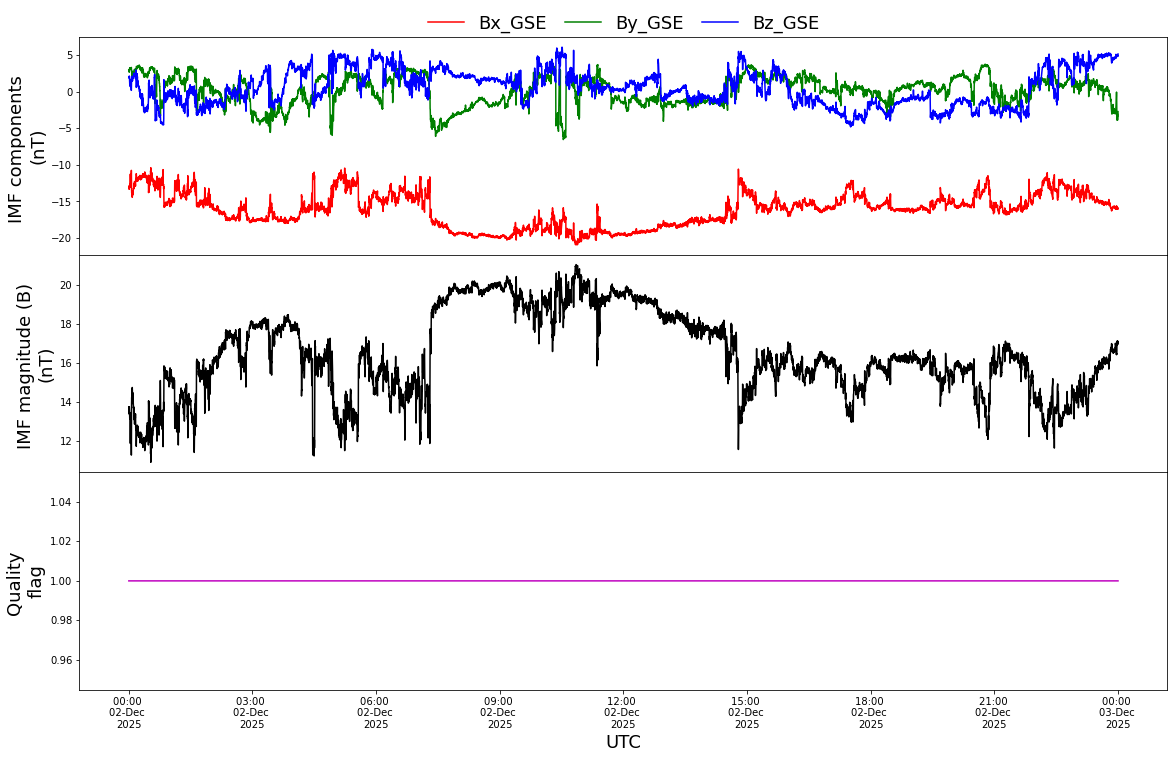

In [49]:
# Plot the variables 
t1=datetime(2025, 12, 2, 0, 0, 0, tzinfo=timezone.utc) # magnetosphere
t2=datetime(2025, 12, 3, 0, 0, 0, tzinfo=timezone.utc)
fonts=18
 
fig=plt.figure(1, figsize=(19.5, 12))
gs=fig.add_gridspec(3, 1, hspace=0.0, wspace=0.0)
ax=gs.subplots(sharex=True, sharey=False)
#---------------------------------------------------------------------------------------------
n1=np.min(np.where(Time_MAG > t1))
n2=np.max(np.where(Time_MAG < t2))
#---------------------------------------------------------------------------------------------
ax[0].plot(Time_MAG[n1:n2+1], Bx_gse[n1:n2+1], '-', color='r', linewidth=1.5, label='Bx_GSE')
ax[0].plot(Time_MAG[n1:n2+1], By_gse[n1:n2+1], '-', color='g', linewidth=1.5, label='By_GSE')
ax[0].plot(Time_MAG[n1:n2+1], Bz_gse[n1:n2+1], '-', color='b', linewidth=1.5, label='Bz_GSE')
ax[0].legend(ncol=3, loc='upper center', frameon=False, fontsize=fonts, markerscale=4., columnspacing =1.0, bbox_to_anchor=(0.5, 1.18))
ax[0].set_ylabel('IMF components \n(nT)', fontsize=fonts)

ax[1].plot(Time_MAG[n1:n2+1], B_gse[n1:n2+1], '-', color='k', linewidth=1.5)
ax[1].set_ylabel('IMF magnitude (B) \n(nT)', fontsize=fonts)

ax[2].plot(Time_MAG[n1:n2+1], q_flag[n1:n2+1], '-', color='m', linewidth=1.5)
ax[2].set_ylabel('Quality \nflag', fontsize=fonts)
ax[2].set_xlabel('UTC', fontsize=fonts)

myFmt=mdates.DateFormatter("%H:%M \n%d-%b \n%Y")
ax[2].xaxis.set_major_formatter(myFmt)
del myFmt

del fig, gs, ax, n1, n2, t1, t2, fonts

# Additional imformation regarding MAG data

1. **Instrument paper:**
Yadav, Vipin K., Y. Vijaya, B. Krishnam Prasad, P. T. Srikar, Monika Mahajan, K. V. L. N. Mallikarjun, Syeeda N. Zamani et al. "The Fluxgate Magnetometer (MAG) on Board Aditya-L1 Spacecraft." Solar Physics 300, no. 3 (2025): 1-37. (DOI: https://link.springer.com/article/10.1007/s11207-025-02440-0)